In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

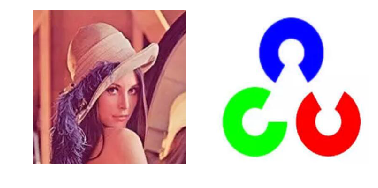

In [67]:
lena = cv2.imread( 'F:\OpenCV3/lena.jpg' )
logo = cv2.imread( 'F:\OpenCV3/logo.jpg' )
rows, cols = lena.shape[:2]
logo = cv2.resize( logo, (cols, rows) )

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor( lena, cv2.COLOR_BGR2RGB ))
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(logo)
plt.axis('off')
plt.show()

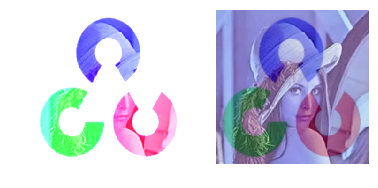

In [64]:
comb = cv2.add( lena, logo )
plt.subplot(121)
plt.imshow(comb)
plt.axis('off')

comb2 = cv2.addWeighted( lena, 0.7, logo, 0.3, 0 )
plt.subplot(122)
plt.imshow( comb2 )
plt.axis('off')
plt.show()

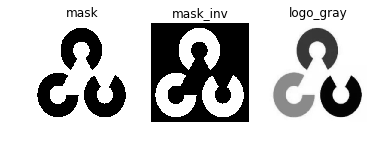

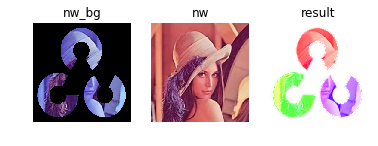

In [112]:
nw = lena.copy()
rows, cols = logo.shape[:2]
roi = nw[:rows, :cols]

logo_gray = cv2.cvtColor( logo, cv2.COLOR_BGR2GRAY )
_, mask = cv2.threshold( logo_gray, 190, 255, cv2.THRESH_BINARY )
mask_inv = cv2.bitwise_not(mask)

plt.subplot(231)
plt.imshow(mask)
plt.title( 'mask' )
plt.axis( 'off' )
plt.subplot(232)
plt.imshow(mask_inv)
plt.title( 'mask_inv' )
plt.axis( 'off' )
plt.subplot(233)
plt.imshow(logo_gray)
plt.title( 'logo_gray' )
plt.axis( 'off' )
plt.show()

nw_bg = cv2.bitwise_and( roi, roi, mask = mask_inv )
dst = cv2.addWeighted( nw_bg, 1, logo, 1, 0)
plt.subplot(234)
plt.imshow(nw_bg)
plt.title( 'nw_bg' )
plt.axis( 'off' )
plt.subplot(235)
plt.imshow(cv2.cvtColor(nw, cv2.COLOR_BGR2RGB))
plt.title( 'nw' )
plt.axis( 'off' )

nw[:rows, :cols] = dst
plt.subplot(236)
plt.imshow(cv2.cvtColor(nw,cv2.COLOR_BGR2RGB))
plt.title( 'result' )
plt.axis( 'off' )
plt.show()

#why result is wrong?
#result is wrong due to the logo_background is white, when we do 'sdt=...'
#the original_background is become white, so when we make '[:rows...]' nothing can
#plus white to be itselfe( x + 255 == 255 )
#my understanding is above, just i think...